In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import matplotlib.pyplot as plt

import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers.experimental import RMSprop, Adam

In [4]:
import gc
import random
def read_data(list, photo_size = 256, valid_flag = False):  
    data = []
    for i in range(len(list)):
        for filename in os.listdir(list[i]):
            img  = cv2.imread(list[i] + filename)
            img = cv2.resize(img,(photo_size,photo_size))
            
            if filename.find("Non_Autistic") !=-1:
                data.append([img, [0,1]])
            elif filename.find("Autistic")!=-1:
                data.append([img, [1,0]])
            #for valid data
            elif list[i].find("Non_Autistic")!=-1:
                data.append([img, [0,1]])
            else:
                data.append([img, [1,0]])
    
    random.shuffle(data)
    if valid_flag:
        return data
    
    x = []
    y = []
    for i in range(len(data)):
        x.append(data[i][0])
        y.append(data[i][1])
    
    x = np.array(x)
    y = np.array(y)
    x = x / 255
    return x, y

In [ ]:
import random
def read_data(list, photo_size = 256, valid_flag = False):  
    data = []
    for i in range(len(list)):
        for filename in os.listdir(list[i]):
            img  = cv2.imread(list[i] + filename)
            img = cv2.resize(img,(photo_size,photo_size))
            
            if filename.find("Non_Autistic") !=-1:
                data.append([img, [0,1]])
            elif filename.find("Autistic")!=-1:
                data.append([img, [1,0]])
            #for valid data
            elif list[i].find("Non_Autistic")!=-1:
                data.append([img, [0,1]])
            else:
                data.append([img, [1,0]])
    
    random.shuffle(data)
    if valid_flag:
        return data
    
    x = []
    y = []
    for i in range(len(data)):
        x.append(data[i][0])
        y.append(data[i][1])
    
    x = np.array(x)
    y = np.array(y)
    x = x / 255
    return x, y


train_add_autis = "/kaggle/input/autism-image-data/AutismDataset/train/"

X_train, y_train = read_data([train_add_autis])

X_test, y_test = read_data(["/kaggle/input/autism-image-data/AutismDataset/test/"])

na = "/kaggle/input/autism-image-data/AutismDataset/valid/Non_Autistic/"
a = "/kaggle/input/autism-image-data/AutismDataset/valid/Autistic/"

x_v, y_v = read_data([na, a])

In [5]:
train_add_autis = "/kaggle/input/autism-image-data/AutismDataset/train/"

X_train, y_train = read_data([train_add_autis])
gc.collect()

52

In [6]:
X_test, y_test = read_data(["/kaggle/input/autism-image-data/AutismDataset/test/"])
gc.collect()

0

In [7]:
na = "/kaggle/input/autism-image-data/AutismDataset/valid/Non_Autistic/"
a = "/kaggle/input/autism-image-data/AutismDataset/valid/Autistic/"

x_v, y_v = read_data([na, a])
gc.collect()

23

In [8]:
def make_model():
    xception = tf.keras.applications.Xception(input_shape=(256, 256,3), include_top=False, weights="imagenet" )
    
    model = tf.keras.models.Sequential([
    xception,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, "relu"),
    tf.keras.layers.Dense(64, "relu"),
    tf.keras.layers.Dense(2, "softmax")
    ])
    
    model.compile(
      optimizer="RMSprop",
      loss=tf.keras.losses.BinaryCrossentropy(),
      metrics=['acc'])    
    return model

In [9]:
model = make_model()
gc.collect()

6726

In [10]:
gc.collect()

23

In [11]:
histroy = model.fit(X_train, y_train,validation_data = [x_v, y_v], epochs = 28)
gc.collect()

2023-02-16 08:08:35.382141: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1997537280 exceeds 10% of free system memory.
2023-02-16 08:08:37.563723: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1997537280 exceeds 10% of free system memory.


Epoch 1/28
80/80 [==============================] - 57s 518ms/step - loss: 0.5623 - acc: 0.7193 - val_loss: 1.4118 - val_acc: 0.5000
Epoch 2/28
80/80 [==============================] - 40s 499ms/step - loss: 0.4129 - acc: 0.8122 - val_loss: 4.5800 - val_acc: 0.6900
Epoch 3/28
80/80 [==============================] - 40s 496ms/step - loss: 0.3241 - acc: 0.8642 - val_loss: 1.4683 - val_acc: 0.8400
Epoch 4/28
80/80 [==============================] - 40s 496ms/step - loss: 0.2448 - acc: 0.9000 - val_loss: 7.6814 - val_acc: 0.5700
Epoch 5/28
80/80 [==============================] - 40s 496ms/step - loss: 0.1546 - acc: 0.9406 - val_loss: 0.7915 - val_acc: 0.8200
Epoch 6/28
80/80 [==============================] - 40s 499ms/step - loss: 0.1163 - acc: 0.9626 - val_loss: 0.6885 - val_acc: 0.8300
Epoch 7/28
80/80 [==============================] - 40s 496ms/step - loss: 0.0719 - acc: 0.9724 - val_loss: 1.7077 - val_acc: 0.7900
Epoch 8/28
80/80 [==============================] - 40s 495ms/step - 

1345

In [12]:
print("train:")
model.evaluate(X_train, y_train)
print("valid:")
model.evaluate(x_v, y_v)
print("test:")
model.evaluate(X_test, y_test)

gc.collect()

train:


2023-02-16 08:27:39.048818: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1997537280 exceeds 10% of free system memory.
2023-02-16 08:27:41.227952: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1997537280 exceeds 10% of free system memory.


80/80 [==============================] - 8s 104ms/step - loss: 0.0814 - acc: 0.9760
valid:
4/4 [==============================] - 0s 74ms/step - loss: 1.7529 - acc: 0.7900
test:
10/10 [==============================] - 1s 96ms/step - loss: 1.5391 - acc: 0.8300


2037

In [13]:
model.save("model.h5")

In [18]:
histroy.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

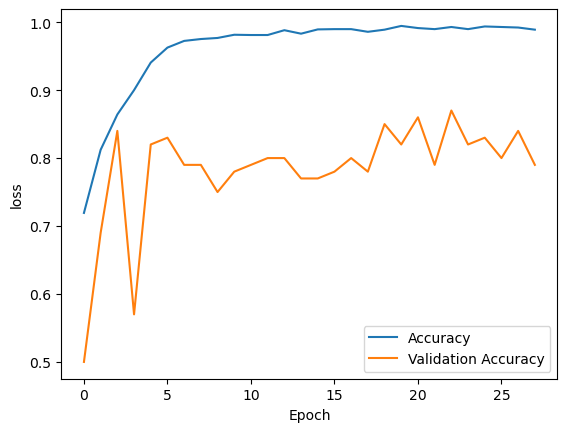

In [20]:
plt.plot(histroy.history['acc'])
plt.plot(histroy.history['val_acc'])
plt.xlabel("Epoch")
plt.ylabel("loss")
#plt.ylim(0 , 1)
#plt.xlim(0 , 28 , 1)
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [21]:
model_early = make_model()
gc.collect()

19693

In [22]:
histroy_early = model_early.fit(X_train, y_train,validation_data = [x_v, y_v], epochs = 6)
gc.collect()

2023-02-16 08:31:48.393571: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1997537280 exceeds 10% of free system memory.


Epoch 1/6
80/80 [==============================] - 49s 508ms/step - loss: 0.5563 - acc: 0.7142 - val_loss: 26.8443 - val_acc: 0.5500
Epoch 2/6
80/80 [==============================] - 40s 499ms/step - loss: 0.3918 - acc: 0.8217 - val_loss: 3.8214 - val_acc: 0.6700
Epoch 3/6
80/80 [==============================] - 40s 495ms/step - loss: 0.2757 - acc: 0.8917 - val_loss: 1.9416 - val_acc: 0.7500
Epoch 4/6
80/80 [==============================] - 40s 499ms/step - loss: 0.1815 - acc: 0.9193 - val_loss: 7.0152 - val_acc: 0.6500
Epoch 5/6
80/80 [==============================] - 40s 495ms/step - loss: 0.1375 - acc: 0.9500 - val_loss: 4.3385 - val_acc: 0.7700
Epoch 6/6
80/80 [==============================] - 40s 499ms/step - loss: 0.1053 - acc: 0.9598 - val_loss: 1.2594 - val_acc: 0.8300


1345

In [23]:
print("train:")
model_early.evaluate(X_train, y_train)
print("valid:")
model_early.evaluate(x_v, y_v)
print("test:")
model_early.evaluate(X_test, y_test)

gc.collect()

train:
80/80 [==============================] - 8s 103ms/step - loss: 0.0753 - acc: 0.9791
valid:
4/4 [==============================] - 0s 74ms/step - loss: 1.2594 - acc: 0.8300
test:
10/10 [==============================] - 1s 96ms/step - loss: 1.0879 - acc: 0.8667


2038

In [24]:
model.save("model_early.h5")

In [25]:
img  = cv2.imread("/kaggle/input/test-data/01.jfif")
img = cv2.resize(img,(256,256))
img = img / 255
test  = np.array([img])
test.shape

y = model.predict(test)
y[0][0]

error: OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
